In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, auc
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv(r'D:\Datasets\Heart Disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
row, col = data.shape
print('Total Number of rows: ',row)
print('Total Number of columns: ',col)

Total Number of rows:  303
Total Number of columns:  14


In [25]:
data.iloc[:,:col-1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [26]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [27]:
data.iloc[1,:]

age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64

In [28]:
str1='hello world'
str1[:5]

'hello'

# Train-Test Split
### 80:20

In [29]:
def get_train_test_split(data):
    
    X = data.drop(['target'], axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)
    
    return X_train, X_test, y_train, y_test    
 
    
X_train, X_test, y_train, y_test = get_train_test_split(data)

In [30]:
print('Number of records in training dataset',len(X_train),',',len(y_train))
print('Number of records in test dataset',len(X_test),',',len(y_test))

Number of records in training dataset 242 , 242
Number of records in test dataset 61 , 61


# Feature Selection
### Normalization

In [31]:
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.fit_transform(X_test)

In [32]:
len(X_train)

242

In [33]:
X_train[0]

array([0.64583333, 1.        , 0.        , 0.43396226, 0.38127854,
       0.        , 0.        , 0.75572519, 0.        , 0.19354839,
       0.5       , 0.5       , 1.        ])

# Model building

In [34]:
import pickle

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
print(result)

0.8688524590163934


In [36]:
# Predict class for X_test
y_pred_logreg = model.predict(X_test)
print('Total number of predicted outputs: ',len(y_pred_logreg),'\n')
y_pred_logreg

Total number of predicted outputs:  61 



array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

# Model Evaluation

In [37]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

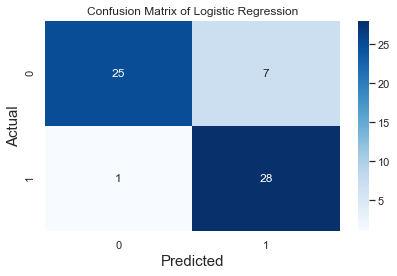

In [38]:
# Logistic Regression model
title = 'Confusion Matrix of Logistic Regression'
plot_confusion_matrix(y_test, y_pred_logreg, 'Blues', title)

# Saving the Finalized Model 

In [39]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [40]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [82]:
import matplotlib.pyplot as plt

a=pd.DataFrame(data['thal'].value_counts()).reset_index()
type(a)

pandas.core.frame.DataFrame

In [83]:
a

,index,thal
0,2,544
1,3,410
2,1,64
3,0,7


<BarContainer object of 4 artists>

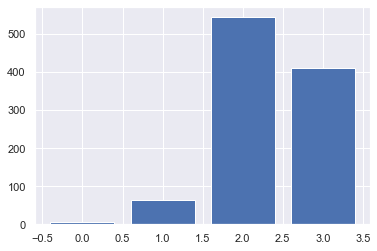

In [79]:
plt.bar(a['index'],a['thal'])

In [85]:
import matplotlib.pyplot as plt

In [90]:
av=pd.DataFrame(data['target'].value_counts()).reset_index()
av

,index,target
0,1,526
1,0,499


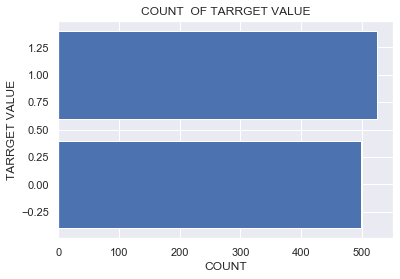

In [103]:
plt.barh(av['index'],av['target'])
plt.ylabel('TARRGET VALUE')
plt.xlabel('COUNT')
plt.title('COUNT  OF TARRGET VALUE')
plt.show()

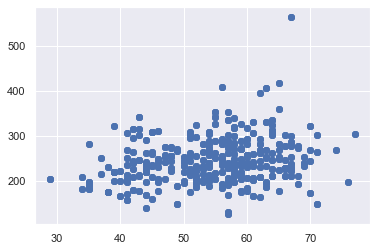

In [105]:
plt.scatter(data['age'],data['chol'])

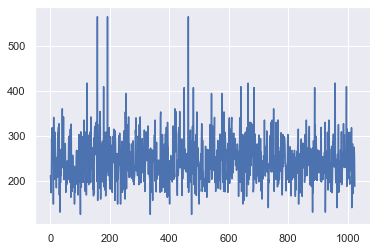

In [110]:
plt.plot(data['chol'])
plt

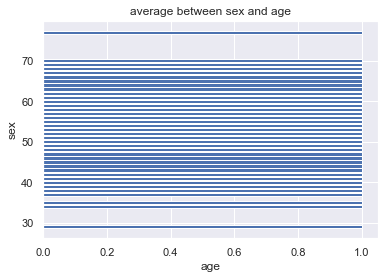

In [9]:
plt.barh(data['age'],data['sex'])
plt.xlabel('age')
plt.ylabel('sex')
plt.title('average between sex and age')
plt.show()

In [11]:
b=pd.DataFrame(data['sex'].value_counts()).reset_index()
b

,index,sex
0,1,713
1,0,312


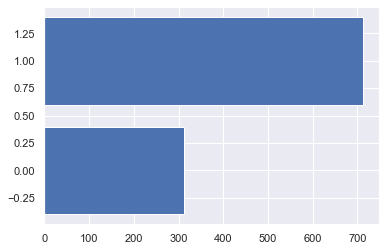

In [29]:
plt.barh(b['index'],b['sex'])
plt.show()